### 期望目标
通过几个重要的历史数据
- IPO价格
- 权证价格
- 股票最高价格
- 买卖时间等
首先，期望达到的目的是：通过历史成绩，增强自我信心。
其次，通过数据分析，找寻一定的规律

### 逻辑梳理

- IPO时间，价格，客户购买金额
- Placing时间，价格，客户购买金额

期望找到的目标：客户资金在每只股票上的分配额度。通过这个结果，反推，什么价格的股票是最适合的and Why


### 近期目标修正
- 期望实现的目标为如果过往的投资者往每只股票中投资10000镑，他们理论上能获得的最大收益为多少

In [48]:
import pandas as pd
from datetime import datetime
import pandas_datareader.data as web
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt


In [25]:
# We would like all available data from 01/01/2000 until 12/31/2016.
# start_date = '2010-01-01'
# end_date = '2021-08-31'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
# panel_data = web.DataReader('palm.l', 'av-daily', start=datetime(2020, 2, 9), end=datetime(2021, 9, 24), api_key='EUWPYIBX33PPD5U5')
ecr_data = web.DataReader('ecr.l', 'av-daily', start=datetime(2020, 1, 1), end=datetime(2021, 9, 24), api_key='EUWPYIBX33PPD5U5')
ecr = ecr_data 

In [96]:
# ecr.to_csv(r'/Users/paxton615/Desktop/ecr_csv.csv')

In [26]:
# check stock price
print(ecr.head(2))
print(ecr.tail(2))


             open  high     low  close   volume
2020-01-02  0.725  0.78  0.6825  0.725   482605
2020-01-03  0.725  0.78  0.7150  0.725  1741346
             open  high    low  close    volume
2021-07-26  1.575  1.75  1.565  1.625  11248950
2021-07-27  1.650  1.70  1.566  1.600   5443371


In [70]:
# 1st Placing date, prices and Warranty date, duration, prices

ecr_p1_date = datetime(2020,4,1)
ecr_p1_price = 0.5  #pence

ecr_w1_date = datetime(2020,4,1)
ecr_w1_dura = 3 #years
ecr_w1_price = 1 #pence



In [72]:
# 2ed Placing date, prices and Warranty date, duration, price

ecr_p2_date = datetime(2020,7,1)
ecr_p2_price = 1.3  #pence

ecr_w2_date = datetime(2020,7,1)
ecr_w2_dura = 3 #years
ecr_w2_price = 2 #pence

# turn string into datetime
# datetime.fromisoformat(ecr_high_date) 


In [75]:
# Highest close price after the last placing

ecr_highest = ecr.loc[ecr.index >= str(ecr_p2_date),:].close.max()


In [95]:
# Mean price from 2020-2021

ecr_mean = ecr.close.mean()
print(ecr.close.mean())

1.844793686868686


- How much do you make?
- For every deal, investor will invest 5000 pounds

In [78]:
# funds put into 1st and 2nd placing

ecr_p1_fund = 5000
ecr_p2_fund = 5000


In [80]:
# Shares owned of 1st and 2nd placing

ecr_p1_shares = ecr_p1_fund/ecr_p1_price
print(ecr_p1_shares)

ecr_p2_shares = round(ecr_p2_fund/ecr_p2_price,0)
print(ecr_p2_shares)


10000.0
3846.0


- we assume that shares and warranties are 1:1

In [81]:
# Warranty owned of 1st and 2nd placing

ecr_p1_war = ecr_p1_shares / 1
ecr_p2_war = ecr_p2_shares / 1
print(ecr_p1_war)
print(ecr_p2_war)


10000.0
3846.0


- Calculate max return with 'ecr_highest' = 4.25


In [85]:
rtn_p1 = (ecr_highest - ecr_p1_price) * ecr_p1_shares +\
            (ecr_highest - ecr_w1_price) * ecr_p1_war

print(rtn_p1)


70000.0


In [89]:
rtn_p2 = (ecr_highest - ecr_p2_price) * ecr_p2_shares +\
            (ecr_highest - ecr_w2_price) * ecr_p2_war
print(rtn_p2)


19999.2


In [92]:
# total return

total_rtn = rtn_p1 + rtn_p2
print(total_rtn)



89999.2


- Calculate mean return with 'ecr_mean' = 1.845

In [93]:
rtn_p1_m = (ecr_mean - ecr_p1_price) * ecr_p1_shares +\
            (ecr_mean - ecr_w1_price) * ecr_p1_war

print(rtn_p1_m)


21895.87373737372


In [94]:
rtn_p2_m = (ecr_mean - ecr_p2_price) * ecr_p2_shares +\
            (ecr_mean - ecr_w2_price) * ecr_p2_war

print(rtn_p2_m)


1498.3530393939327


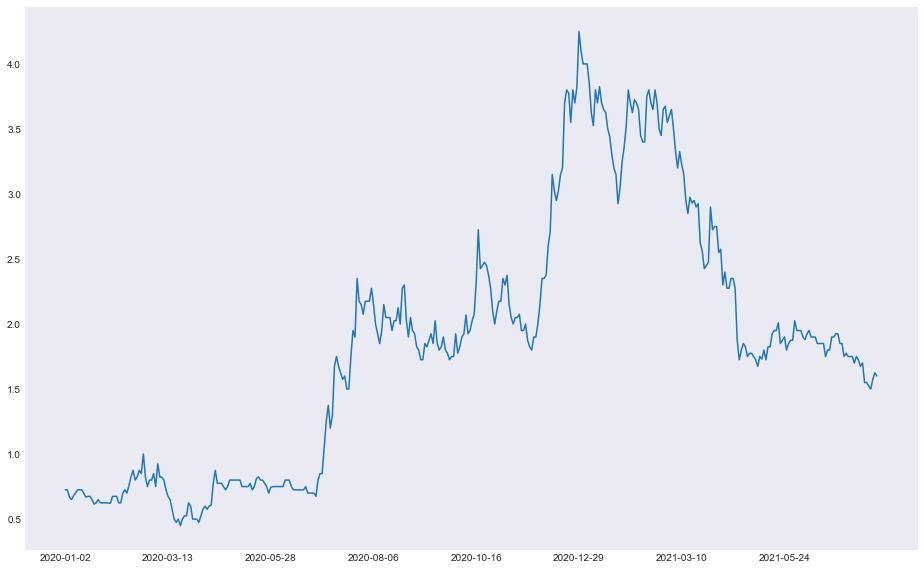

In [61]:
plt.figure(figsize=(16,10))
plt.style.use('seaborn-dark')
ecr.close.plot()